In [4]:
!pip install ultralytics

In [5]:
!pip install opencv-python-headless


Saving Screenshot 2024-12-16 at 15-55-19 360_F_646903073_HT2f4DQ3DGVmwdYqRBUthp1hR1PmYNXK.jpg (JPEG Image 540 × 360 pixels).png to Screenshot 2024-12-16 at 15-55-19 360_F_646903073_HT2f4DQ3DGVmwdYqRBUthp1hR1PmYNXK.jpg (JPEG Image 540 × 360 pixels).png
YOLO model loaded successfully!

0: 448x640 15 persons, 187.5ms
Speed: 5.3ms preprocess, 187.5ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
- person with confidence 92.44%
- person with confidence 91.39%
- person with confidence 87.73%
- person with confidence 80.52%
- person with confidence 74.48%
- person with confidence 63.58%
- person with confidence 62.41%
- person with confidence 59.47%
- person with confidence 43.13%
- person with confidence 41.98%
- person with confidence 39.54%
- person with confidence 35.56%
- person with confidence 29.56%
- person with confidence 28.94%
- person with confidence 26.66%
Total persons detected: 15


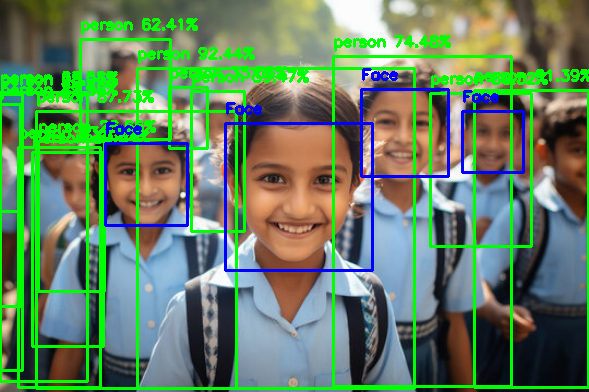

In [7]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from google.colab import files

def upload_and_detect_faces():
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Unable to read the image. Please check the path.")
        return

    try:
        model = YOLO("yolov8n.pt")
        print("YOLO model loaded successfully!")
    except Exception as e:
        print(f"Error loading YOLO model: {e}")
        return

    results = model(image)
    detections = results[0] #detected objects
    total_objects = len(detections.boxes) #counting number of detected objects

    human_boxes = [] #to store total recognised faces
    for box in detections.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = int(box.cls[0])
        confidence = box.conf[0] * 100
        class_name = model.names[label]

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2) #box on detected object
        cv2.putText(image, f"{class_name} {confidence:.2f}%",  (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2) #add labels on the image
        print(f"- {class_name} with confidence {confidence:.2f}%")

        if model.names[label] == "person":
            human_boxes.append(box)

    print(f"Total persons detected: {len(human_boxes)}")

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    if face_cascade.empty():
        print("Error loading Haar Cascade!")
        return
    for human_box in human_boxes:
        x1, y1, x2, y2 = map(int, human_box.xyxy[0])
        person_roi = image[y1:y2, x1:x2]
        if person_roi.size == 0:
            print(f"Skipping empty ROI for bounding box ({x1}, {y1}, {x2}, {y2})")
            continue

        faces = face_cascade.detectMultiScale(person_roi, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        for (fx, fy, fw, fh) in faces:
            face_x1, face_y1 = x1 + fx, y1 + fy
            face_x2, face_y2 = face_x1 + fw, face_y1 + fh
            cv2.rectangle(image, (face_x1, face_y1), (face_x2, face_y2), (255, 0, 0), 2)
            cv2.putText(image, "Face", (face_x1, face_y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    cv2.imwrite("output_with_boxes.jpg", image)
    cv2_imshow(image)

upload_and_detect_faces()
